In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
churn_df=df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df['churn']=churn_df['churn'].astype(int)
churn_df.head()

/tmp/ipykernel_92203/2097294993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn']=churn_df['churn'].astype(int)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [7]:
churn_df.shape

(200, 10)

In [8]:
x=np.asanyarray(churn_df.drop(['churn'],axis=1))
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [10]:
y=np.asanyarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [12]:
x=preprocessing.StandardScaler().fit(x).transform(x)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [14]:
print("Train data: ",x_train.shape,y_train.shape)
print("Test data: ",x_test.shape,y_test.shape)


Train data:  (160, 9) (160,)
Test data:  (40, 9) (40,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [17]:
y_cap=model.predict(x_test)
y_cap

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [20]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [19]:
#Model Evaluation
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_cap,pos_label=0)

0.5625

In [28]:
#Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confucsion Matrix',cmap=plt.cm.Blues):
    if normalize:
        xm=xm.astype(float)/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix,without Normalization")
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
print(confusion_matrix(y_test,y_cap,labels=[0,1]))

[[18  7]
 [ 7  8]]


Confusion matrix,without Normalization
[[18  7]
 [ 7  8]]


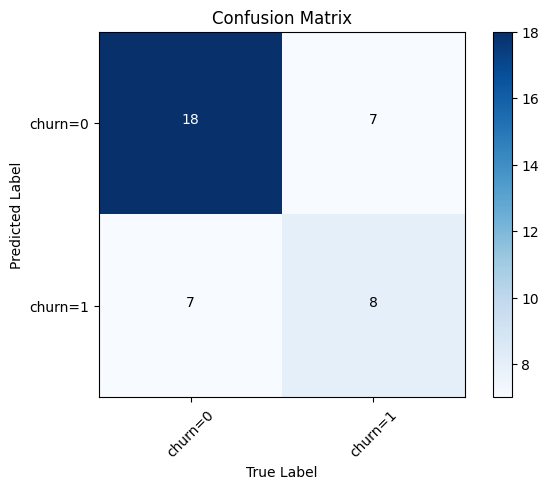

In [29]:
#Computing the confusion matrix
conf=confusion_matrix(y_test,y_cap,labels=[0,1])
np.set_printoptions(2)
plt.figure()
plot_confusion_matrix(conf,classes=['churn=0','churn=1'],normalize=False,title='Confusion Matrix')

In [30]:
#Classification report
print(classification_report(y_test,y_cap))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [35]:
y_cap_prob=model.predict_proba(x_test)
y_cap_prob

array([[0.59, 0.41],
       [0.57, 0.43],
       [0.53, 0.47],
       [0.67, 0.33],
       [0.53, 0.47],
       [0.6 , 0.4 ],
       [0.5 , 0.5 ],
       [0.57, 0.43],
       [0.4 , 0.6 ],
       [0.59, 0.41],
       [0.55, 0.45],
       [0.59, 0.41],
       [0.52, 0.48],
       [0.41, 0.59],
       [0.69, 0.31],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.46, 0.54],
       [0.47, 0.53],
       [0.57, 0.43],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.67, 0.33],
       [0.5 , 0.5 ],
       [0.48, 0.52],
       [0.73, 0.27],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.74, 0.26],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.41, 0.59],
       [0.74, 0.26],
       [0.64, 0.36],
       [0.6 , 0.4 ],
       [0.46, 0.54],
       [0.57, 0.43],
       [0.69, 0.31],
       [0.48, 0.52]])

In [36]:
#printing the log loss
from sklearn.metrics import log_loss
log_loss(y_test,y_cap_prob)

0.6155809757244557

**This is the End**